Training samples: 455
Testing samples: 114
Training Accuracy: 0.989
Testing Accuracy: 0.982
Cross-validation scores: [0.96703297 0.97802198 0.96703297 1.         0.98901099]
Mean: 0.9802197802197803
Standard deviation: 0.012815278889769896
Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9762    0.9762    0.9762        42
           1     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114



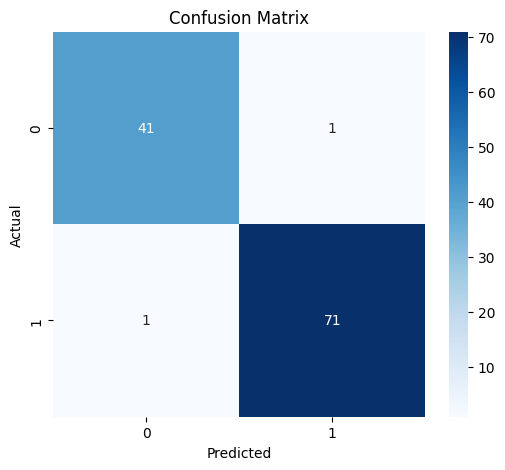

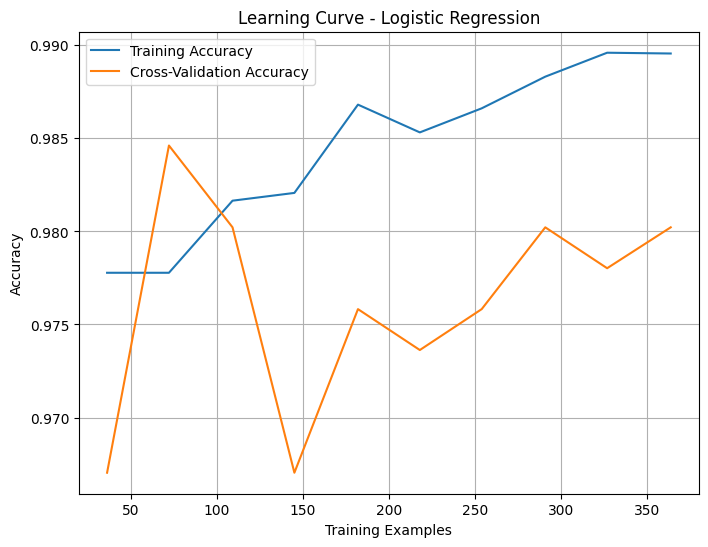

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score



data = load_breast_cancer(as_frame=True)
df = data.frame
df.head()


# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Testing Accuracy: {test_acc:.3f}")


cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

with open('cross_validation.txt','w') as f:
    f.write(f"Cross-validation scores: {cv_scores}\n")
    f.write(f"Mean: {cv_scores.mean():.4f}\n")
    f.write(f"Standard deviation: {cv_scores.std():.4f}\n")


y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", bbox_inches='tight')
plt.show()


train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, val_mean, label='Cross-Validation Accuracy')
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.savefig("learning_curve.png", bbox_inches='tight')
plt.show()
